In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
# Fetch historical data for Apple Inc. (AAPL) from Yahoo Finance

ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Select only the 'Close' price column

data = data[["Close"]]
# Normalize the 'Close' price data using MinMaxScaler (range 0 to 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data["Close"] = scaler.fit_transform(np.array(data["Close"]).reshape(-1, 1))

In [ ]:
data

Price,Close
Ticker,AAPL
Date,
2020-01-02,0.150853
2020-01-03,0.145055
2020-01-06,0.149761
2020-01-07,0.146961
2020-01-08,0.156491
...,...
2022-12-23,0.601723
2022-12-27,0.587190


In [ ]:

# Split the data into training and testing sets (80% training, 20% testing)

train_size = int(len(data) * 0.8)
train_data, test_data = data[0:train_size], data[train_size:len(data)]

In [ ]:
data.columns

MultiIndex([('Close', 'AAPL')],
           names=['Price', 'Ticker'])

In [ ]:
data.index.values

array(['2020-01-02T00:00:00.000000000', '2020-01-03T00:00:00.000000000',
       '2020-01-06T00:00:00.000000000', '2020-01-07T00:00:00.000000000',
       '2020-01-08T00:00:00.000000000', '2020-01-09T00:00:00.000000000',
       '2020-01-10T00:00:00.000000000', '2020-01-13T00:00:00.000000000',
       '2020-01-14T00:00:00.000000000', '2020-01-15T00:00:00.000000000',
       '2020-01-16T00:00:00.000000000', '2020-01-17T00:00:00.000000000',
       '2020-01-21T00:00:00.000000000', '2020-01-22T00:00:00.000000000',
       '2020-01-23T00:00:00.000000000', '2020-01-24T00:00:00.000000000',
       '2020-01-27T00:00:00.000000000', '2020-01-28T00:00:00.000000000',
       '2020-01-29T00:00:00.000000000', '2020-01-30T00:00:00.000000000',
       '2020-01-31T00:00:00.000000000', '2020-02-03T00:00:00.000000000',
       '2020-02-04T00:00:00.000000000', '2020-02-05T00:00:00.000000000',
       '2020-02-06T00:00:00.000000000', '2020-02-07T00:00:00.000000000',
       '2020-02-10T00:00:00.000000000', '2020-02-11

In [ ]:
# Display the date range of the data

train_size = int(len(data) * 0.8)
train_data, test_data = data[0:train_size], data[train_size:len(data)]

In [ ]:
min_dt=data.index.values[0]
max_dt=data.index.values[-1]

In [ ]:
# Print the start and end dates of the dataset

print(min_dt)
print(max_dt)

2020-01-02T00:00:00.000000000
2022-12-30T00:00:00.000000000


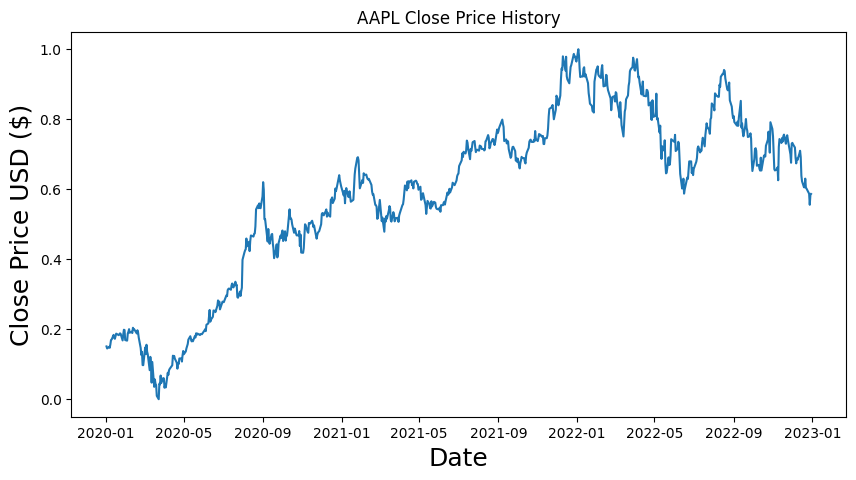

In [ ]:
# Plot the closing price history for AAPL

plt.figure(figsize=(10,5))
plt.title('AAPL Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)

train_size = int(len(data) * 0.8)
train_data, test_data = data[0:train_size], data[train_size:len(data)]

In [ ]:
# Function to create sequences of data for the LSTM model (time series data)

def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data.iloc[i:(i+seq_length)].values # Get values using iloc to avoid index issues
        y = data.iloc[i+seq_length].values # Get values using iloc to avoid index issues
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 100  # Adjust sequence length as needed
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
# Reshape the data to match the input shape for LSTM (samples, timesteps, features)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Build the LSTM model

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model with Adam optimizer and MSE loss function

model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the LSTM model on the training data

model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_test,y_test))  # Adjust epochs and batch size


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.4136 - val_loss: 0.0485
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0176 - val_loss: 0.0040
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.0021 - val_loss: 0.0025


In [ ]:
# Predict the stock prices for the training and testing data

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [ ]:
# Inverse transform the predicted values to get the actual stock prices
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test_re = scaler.inverse_transform(y_test.reshape(-1, 1))

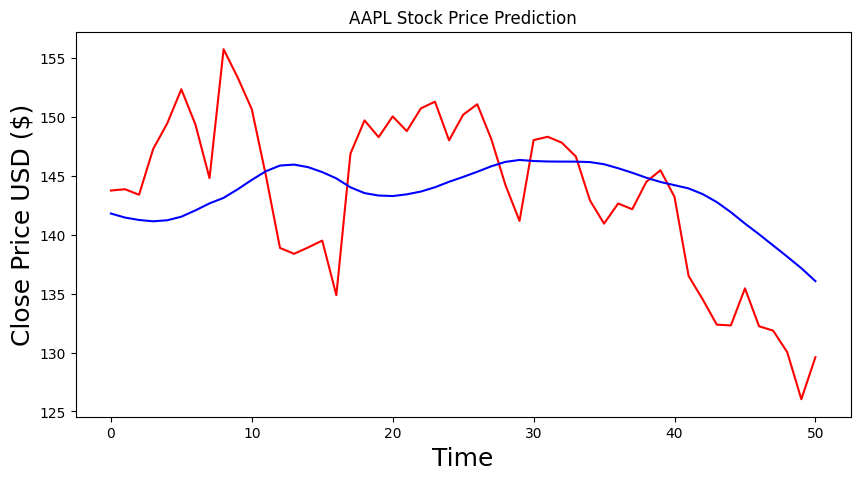

In [ ]:
# Plot the predicted vs actual stock prices for the test set




plt.figure(figsize=(10,5))
plt.plot(y_test_re, color = 'red', label = 'Real AAPL Stock Price')
plt.plot(test_predict, color = 'blue', label = 'Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()